In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial.distance import cdist
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

modified from:
- https://pythonprogramminglanguage.com/kmeans-elbow-method/

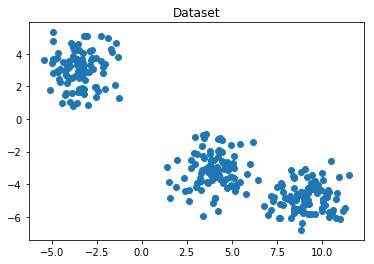

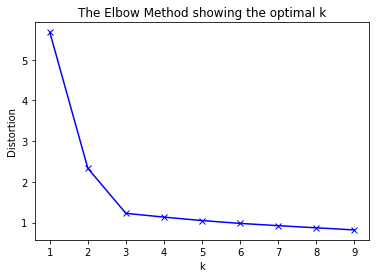

In [114]:
# create new data
# x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
# x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
# X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# X = init_board_gauss(800, 7)
X, cluster_labels = make_blobs(n_samples=300, centers=3)

plt.plot()
plt.title('Dataset')
plt.scatter([x for (x,y) in X], [y for (x,y) in X])
plt.show()

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    # cdist simply calculates the distance between two points using the metric given - in this case 'euclidean'
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

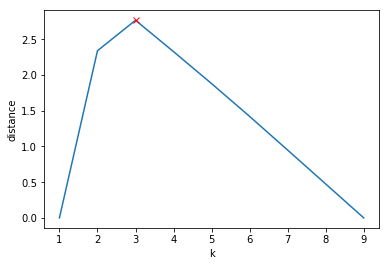

In [115]:
# https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points
# distance between p3 and the line btwn p1 and p2
# d = np.linalg.norm(np.cross(p2-p1, p1-p3))/norm(p2-p1)

new_points = [np.array(a) for a in zip(K, distortions)]

second_derivs = []
for index in range(0, len(new_points)):
    second_derivs.append(np.linalg.norm(np.cross(new_points[-1]-new_points[0], 
                                                 new_points[0]-new_points[index]))/np.linalg.norm(new_points[-1]-new_points[0]))
    
plt.plot(K, second_derivs)
plt.plot(second_derivs.index(max(second_derivs))+1, max(second_derivs), 'rx')
plt.xlabel('k')
plt.ylabel('distance')

copy-pasted from:
- https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
- https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/

a simple implementation of Lloyd’s algorithm for performing k-means clustering in python:

In [28]:
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
            
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(list(X), K)
    mu = random.sample(list(X), K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)
            
def init_board(N):
    """Returns an array with N entries of size 2."""
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X
            
def init_board_gauss(N, k):
    """Returns an array with N entries of size 2 that form k clusters."""
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X       

In [13]:
init_board(3)

array([[-0.31162954, -0.38662587],
       [ 0.76238269, -0.95695831],
       [-0.47585183,  0.40139941]])

In [29]:
find_centers(init_board_gauss(10, 3), 3)

([array([-0.33513889,  0.50988256]),
  array([-0.6910581 ,  0.54426769]),
  array([-0.34425345, -0.17794745])],
 {0: [array([-0.44990355,  0.65962601]),
   array([-0.27410257,  0.42810994]),
   array([-0.49702927,  0.58952461]),
   array([-0.2169137 ,  0.44610696]),
   array([-0.23774536,  0.42604529])],
  1: [array([-0.6910581 ,  0.54426769])],
  2: [array([-0.44539873, -0.11766077]),
   array([-0.36338472, -0.18153769]),
   array([-0.27222284, -0.20513734]),
   array([-0.29600749, -0.20745402])]})

In [31]:
def Wk(mu, clusters):
    """Return the corresponding variance quantity with the given mu and the number of clusters."""
    K = len(mu)
    return sum([np.linalg.norm(mu[i]-c)**2/(2*len(c)) \
               for i in range(K) for c in clusters[i]])

def bounding_box(X):
    xmin, xmax = min(X,key=lambda a:a[0])[0], max(X,key=lambda a:a[0])[0]
    ymin, ymax = min(X,key=lambda a:a[1])[1], max(X,key=lambda a:a[1])[1]
    return (xmin,xmax), (ymin,ymax)
 
def gap_statistic(X):
    """Returns four lists to help calculate the gap statistic.
    
    ks: the number of clusters
    Wks: 
    Wkbs:
    sk: the estimated gap statistic
    """
    (xmin,xmax), (ymin,ymax) = bounding_box(X)
    # Dispersion for real distribution
    ks = range(1,10)
    Wks = np.zeros(len(ks))
    Wkbs = np.zeros(len(ks))
    sk = np.zeros(len(ks))
    for indk, k in enumerate(ks):
        mu, clusters = find_centers(X,k)
        Wks[indk] = np.log(Wk(mu, clusters))
        # Create B reference datasets
        B = 10
        BWkbs = np.zeros(B)
        for i in range(B):
            Xb = []
            for n in range(len(X)):
                Xb.append([random.uniform(xmin,xmax),
                          random.uniform(ymin,ymax)])
            Xb = np.array(Xb)
            mu, clusters = find_centers(Xb,k)
            BWkbs[i] = np.log(Wk(mu, clusters))
        Wkbs[indk] = sum(BWkbs)/B
        sk[indk] = np.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
    sk = sk*np.sqrt(1+1/B)
    return(ks, Wks, Wkbs, sk)

In [48]:
X = init_board_gauss(200,4)
ks, logWks, logWkbs, sk = gap_statistic(X)

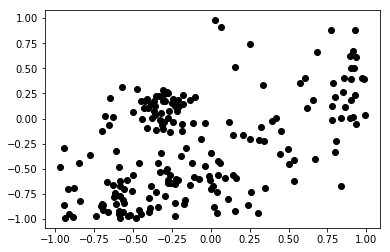

In [58]:
plt.plot([a for (a,b) in X], [b for (a,b) in X], 'ko')

In [49]:
print(ks, logWks, logWkbs, sk)

range(1, 10) [ 3.22363274  2.58178509  2.39208631  1.55199782  1.30510011  1.11541365
  1.04549048  0.88573991  0.79516578] [ 3.47891013  2.99645535  2.5002759   2.03165427  1.90551134  1.67736781
  1.51004376  1.3624242   1.22141577] [ 0.03286932  0.06956882  0.06612182  0.03049225  0.03011459  0.039876
  0.06307612  0.05159748  0.0727933 ]


In [50]:
gaps = [a-b for (a,b) in zip(logWkbs, logWks)] # gap(k)
gap_diffs = [] # gap(k) - (gap(k+1) - sk+1)

for index in range(0, len(gaps)-1):
    gap_diffs.append(gaps[index] - (gaps[index+1] - sk[index+1]))

In [51]:
print(gaps)

[0.25527738464049721, 0.41467025591490447, 0.10818959433828779, 0.47965645269820567, 0.60041123699323995, 0.56195415796693493, 0.46455327726316642, 0.47668429519026201, 0.42624998636041944]


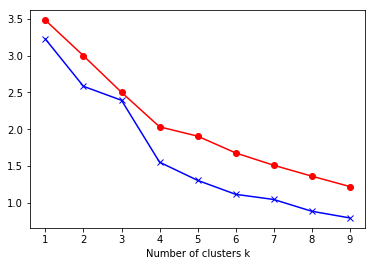

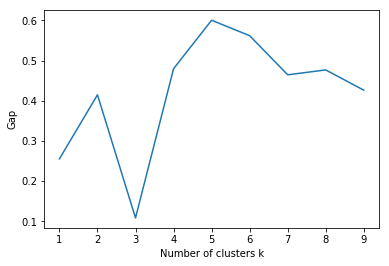

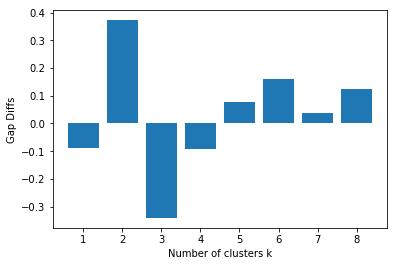

In [52]:
# something's still wonky here...
# It maybe actually be init_board_gauss that isn't working correctly

plt.plot(ks, logWks, 'bx-')
plt.plot(ks, logWkbs, 'ro-')
plt.xlabel('Number of clusters k')
plt.show()

plt.plot(ks, gaps)
plt.xlabel('Number of clusters k')
plt.ylabel('Gap')
plt.show()

plt.bar(ks[:-1], gap_diffs)
plt.xlabel('Number of clusters k')
plt.ylabel('Gap Diffs')
plt.show()